### Question 1
Dans un fichier 1_karate.py que vous allez créer, aidez-vous de Google et de la documentation Networkx pour charger le graphe Zachary's Karate Club.

In [2]:
import numpy as np
import networkx as nx
from matplotlib import pyplot as plt
import scipy
import gc

In [4]:
G = nx.karate_club_graph()
print("Node Degree")
for v in G:
    print(f"{v:4} {G.degree(v):6}")

Node Degree
   0     16
   1      9
   2     10
   3      6
   4      3
   5      4
   6      4
   7      4
   8      5
   9      2
  10      3
  11      1
  12      2
  13      5
  14      2
  15      2
  16      2
  17      2
  18      2
  19      3
  20      2
  21      2
  22      2
  23      5
  24      3
  25      3
  26      2
  27      4
  28      3
  29      4
  30      4
  31      6
  32     12
  33     17


### Question 2
Affichez le nombre de noeuds et le nombre d'edges. En déduire le degré moyen. A l'aide de la méthode G.degree, calculez le degré maximal du graphe. Puis affichez la liste des noeuds.

In [4]:
print("nb nodes : ",len(G.nodes))
print("nb edges : ",len(G.edges))
print("average degree :", len(G.edges)/len(G.nodes))

nb nodes :  34
nb edges :  78
average degree : 2.2941176470588234


### Question 3
A l'aide de nx.draw_networkx, affichez une visualisation du graphe.

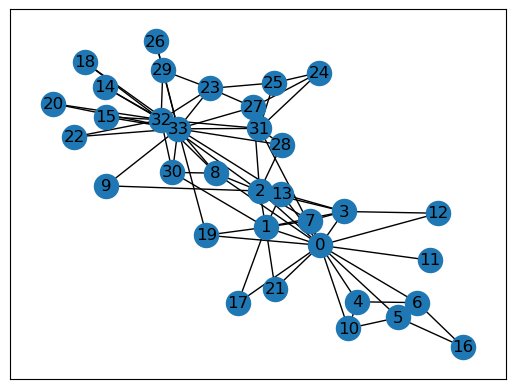

In [5]:
nx.draw_networkx(G)

### Question 4
Affichez un graphique de la distribution des degrés

In [6]:
nb_degree_per_node = set([(edge[0],len([i for i in G.edges if i[0]==edge[0]])) for edge in G.edges])

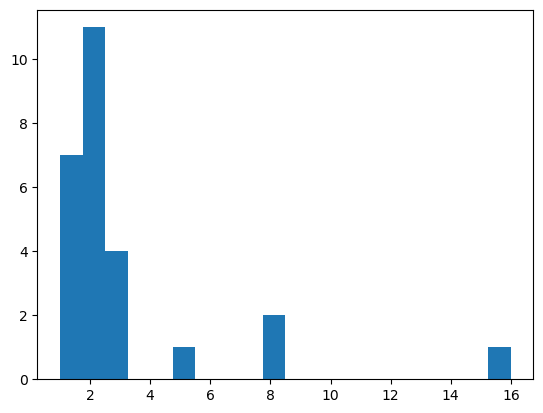

In [7]:
plt.hist([node[1] for node in nb_degree_per_node],
         bins=20);

In [8]:
for i in G.neighbors(7):
    print(i)

0
1
2
3


### Question 5
Créez une fonction get_clustering_coefficient qui pour un graphe et un noeud donnés calcule le coefficient de clustering local, sans bien-sûr utiliser la fonction native : utilisez G.neighbors et nx.subgraph. <br>Comparez vos résultats avec la fonction native de networkx nx.clustering.

In [9]:
[neighbor for neighbor in G.neighbors(21)]

[0, 1]

In [10]:
def get_clustering_coefficient(graph, node) :
    node_neighbours = [neighbor for neighbor in graph.neighbors(node)]
    nb_neighbours = len(node_neighbours)
    subgraph_with_node = nx.subgraph(graph, node_neighbours)
    nb_edges_subgraph = len(subgraph_with_node.edges)
    total_possible_edges = (nb_neighbours-1)*(nb_neighbours)/2 #n*(n-1)/2
    if total_possible_edges!= 0 :
        return (nb_edges_subgraph/total_possible_edges)
    return 0

In [11]:
get_clustering_coefficient(G, 21)

1.0

In [12]:
nx.clustering(G, 21)

1.0

### Question 6
Construisez à partir de la question 5 une fonction calculant le coefficient de clustering moyen d'un graphe, et appliquez-la au Karate Club.<br> Comparez vos résultats avec la fonction nx.average_clustering.

In [13]:
def get_graph_clustering_coefficient(graph):
    nodes = [node for node in graph.nodes]
    return sum([get_clustering_coefficient(graph, node) for node in nodes])/len(nodes)

In [14]:
get_graph_clustering_coefficient(G)

0.5706384782076823

In [15]:
nx.average_clustering(G)

0.5706384782076823

### Question 7
Comparez la valeur trouvée au coefficient de clustering moyen d'un graphe Gnm. Que remarquez-vous ?

In [16]:
gnm = nx.gnm_random_graph(100, 200, seed=41)

In [17]:
nx.average_clustering(gnm)

0.04085714285714286

In [18]:
get_graph_clustering_coefficient(gnm)

0.04085714285714286

### Question 8
Implémentez une fonction dfs qui effectue un depth-first search dans un graphe, et affiche les noeuds au fil de leur visite

In [19]:
def dfs(graph, source):
    visits = [source]
    for edge in nx.dfs_edges(G, source=source):
        visits.append(edge[1])
    return visits

print(dfs(G, 0))

[0, 1, 2, 3, 7, 12, 13, 33, 8, 30, 32, 14, 15, 18, 20, 22, 23, 25, 24, 27, 31, 28, 29, 26, 9, 19, 17, 21, 4, 6, 5, 10, 16, 11]


### Question 9
Implémentez une fonction bfs qui effectue un breadth-first search dans un graphe, et affiche les noeuds au fil de leur visite

In [20]:
def bfs(graph, source):
    visits = [source]
    for edge in nx.bfs_edges(G, source):
        visits.append(edge[1])
    return visits

print(bfs(G, 0))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 17, 19, 21, 31, 30, 9, 27, 28, 32, 16, 33, 24, 25, 23, 14, 15, 18, 20, 22, 29, 26]


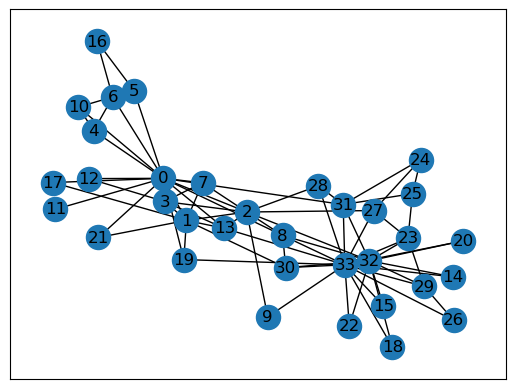

In [21]:
nx.draw_networkx(G)

In [22]:
visits = []
for i in nx.bfs_edges(G,0):
    visits.append(i)
print(visits)

[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 10), (0, 11), (0, 12), (0, 13), (0, 17), (0, 19), (0, 21), (0, 31), (1, 30), (2, 9), (2, 27), (2, 28), (2, 32), (5, 16), (8, 33), (31, 24), (31, 25), (27, 23), (32, 14), (32, 15), (32, 18), (32, 20), (32, 22), (32, 29), (33, 26)]


### Question 10
Implémentez une fonction shortest_path_length qui calcule la longueur du plus court chemin entre deux noeuds

In [41]:
def shortest_path_length(graph, node_1, node_2):
    visits = []
    for edge in nx.bfs_edges(graph, node_1):
        visits.append(edge)
    #No path exists 
    if node_2 not in [edge[1] for edge in visits] :
        return 0
    
    def f(start_nodes, arrival_node, depth):
        depth +=1
        path_node = [edge[1] for edge in visits if edge[0] in start_nodes]
        if arrival_node in path_node :
            # print('Found')
            return depth
        else :
            # print('One more recursive function')
            return f(path_node, arrival_node, depth)
    
    return f(start_nodes=[node_1], arrival_node=node_2, depth=0)

In [163]:
test = shortest_path_length(G, 0, 20)
print("Shortest path length : ", test)

Shortest path length :  3


In [23]:
test = nx.shortest_path_length(G, source=0, target=20)
print("Shortest path length : ", test)

Shortest path length :  3


In [24]:
gc.collect()

16026

### Question 11
Créez une fonction qui calcule une approximation de la longueur moyenne en sélectionnant aléatoirement 20 paires de noeuds distincts et en utilisant la fonction shortest_path_length

In [100]:
import random

def avg_shortest_path_length(graph, n=20):
    random_nodes = random.sample(list(graph.nodes), n)
    random_shortest_paths = [nx.shortest_path_length(graph, source, target) for i, source in enumerate(random_nodes) for j,target in enumerate(random_nodes) if i>j]
    return sum(random_shortest_paths)/len(random_shortest_paths)


In [116]:
gc.collect()

0

In [115]:
avg_shortest_path_length(G)

2.3789473684210525

### Question 12
A l'aide de la fonction nx.adjacency_matrix, normalize de sklearn et de numpy, implémentez une fonction pagerank_no_teleport qui calcule le pagerank (sans téléport) d'un graphe par la méthode de la puissance itérée. <br>
Utilisez un epsilon de 1e-5 ou 1e-6. Affichez la valeur du pagerank pour chaque noeud. Affichez l'index des deux noeuds dont le pagerank est maximal.

In [12]:
nx.adjacency_matrix(G)

C:\Users\huang\AppData\Local\Temp\ipykernel_47540\2722112681.py:1: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  type(nx.adjacency_matrix(G))


scipy.sparse._csr.csr_matrix

In [ ]:
def pagerank_no_teleport(graph, epsilon):
    pass

### Question 13
Créez une fonction pagerank calculant le pagerank avec téléport à votre fonction (choisissez beta=0.85 par exemple). Comment ont évolué les valeurs du pagerank après ajout du téléport ?

In [19]:
def pagerank(graph, beta : float) -> dict:
    return []

### Question 14
Comparez vos résultats avec la fonction nx.pagerank de networkx.

In [27]:
nx.pagerank(G, alpha=0.5)

{0: 0.07212698693336017,
 1: 0.04672101546530401,
 2: 0.04718698262939676,
 3: 0.034212542761862655,
 4: 0.024335598267903488,
 5: 0.03349532727626625,
 6: 0.03179609109104932,
 7: 0.025356264683098522,
 8: 0.02893316250076042,
 9: 0.017057615509593498,
 10: 0.024574939471743214,
 11: 0.01728189355925183,
 12: 0.01841560340561436,
 13: 0.02876069928445492,
 14: 0.018765951281321306,
 15: 0.02040273207952483,
 16: 0.02196348256545442,
 17: 0.017228768517544634,
 18: 0.01715042586120357,
 19: 0.01885270427704275,
 20: 0.017947560882219545,
 21: 0.018034313877940987,
 22: 0.0187765789703642,
 23: 0.03455539661883662,
 24: 0.02158069171081316,
 25: 0.027943169476871012,
 26: 0.020800353927192726,
 27: 0.02732461762428085,
 28: 0.019498506227933816,
 29: 0.028975263745513177,
 30: 0.023748303165371257,
 31: 0.03624667543412216,
 32: 0.06138727987986935,
 33: 0.07856250103692017}